In [14]:
import math
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [2]:
%load_ext autoreload
%autoreload 2
from nncomp_molecule import constants
from nncomp.preprocessors.images.albumentations import LongestSizePadding

In [3]:
PREPROCESSED_DIR = constants.INPUTDIR / "kfujikawa" / "bms-preprocess-v2"

In [4]:
train_df = pd.read_pickle(PREPROCESSED_DIR / "train.pkl").assign(train=True)

In [73]:
train_df.sort_values("w*h")

,image_id,InChI,image_path,InChI_length,w,h,w/h,w*h,train
2420289,3873f14c4b90,InChI=1S/C9H7N/c1-2-8-4-6-3-7(1)9(8)10-5-6/h1-...,/work/input/bms-molecular-translation/train/3/...,57,117,98,1.193878,11466,True
2423938,4111228289d4,InChI=1S/C9H5N/c1-3-8-7-2-4-9(10-8)6(1)5-7/h1-5H,/work/input/bms-molecular-translation/train/4/...,48,123,96,1.281250,11808,True
2424176,9d24c1243b65,"InChI=1S/C2H4O/c1-2-3/h2H,1H3/i1D3,2D",/work/input/bms-molecular-translation/train/9/...,37,120,102,1.176471,12240,True
2424182,d0e2cee71021,InChI=1S/C2H3ClO/c1-2(3)4/h1H3/i1D3,/work/input/bms-molecular-translation/train/d/...,35,121,102,1.186275,12342,True
2380399,56c143556164,InChI=1S/C10H14O/c1-10-2-4-6-7(8(6)10)5(3-10)9...,/work/input/bms-molecular-translation/train/5/...,70,119,105,1.133333,12495,True
...,...,...,...,...,...,...,...,...,...
1038,250e953a1a17,InChI=1S/C80H157NO5/c1-3-5-7-9-11-13-15-17-19-...,/work/input/bms-molecular-translation/train/2/...,329,2482,885,2.804520,2196570,True
1374,928e2ca39cc2,InChI=1S/C77H151NO5/c1-3-5-7-9-11-13-15-17-18-...,/work/input/bms-molecular-translation/train/9/...,320,2402,920,2.610870,2209840,True
1213,91ff9b81ab16,InChI=1S/C77H149NO5/c1-3-5-7-9-11-13-14-15-16-...,/work/input/bms-molecular-translation/train/9/...,324,2166,1024,2.115234,2217984,True
925,c0af6c6068a6,InChI=1S/C81H159NO5/c1-3-5-7-9-11-13-15-17-19-...,/work/input/bms-molecular-translation/train/c/...,332,2522,954,2.643606,2405988,True


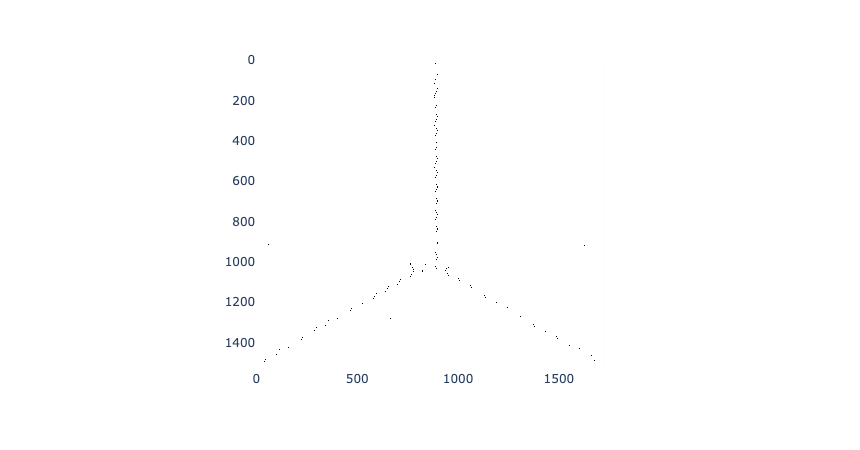

In [74]:
image_id = "16df9170c134"
datadir = constants.COMPETITION_DATADIR / "train"
image_path = datadir / "/".join(image_id[:3]) / f"{image_id}.png"
image = cv2.imread(str(image_path))
px.imshow(image)

In [75]:
def pad_image_outsides(image, h, w, pad_value=255):    
    h_origin, w_origin, d = image.shape
    padded_image = np.full(
        (h, w, d),
        pad_value,
        dtype=image.dtype
    )
    center_h_origin, center_h_padded = h_origin // 2, h // 2
    center_w_origin, center_w_padded = w_origin // 2, w // 2
    h_start = center_h_padded - center_h_origin
    w_start = center_w_padded - center_w_origin
    padded_image[h_start:h_start + h_origin, w_start:w_start + w_origin] = image
    return padded_image

In [76]:
shape = [math.ceil(x / 32) * 32 for x in image.shape[:2]]
shape, image.shape

([1568, 1728], (1537, 1723, 3))

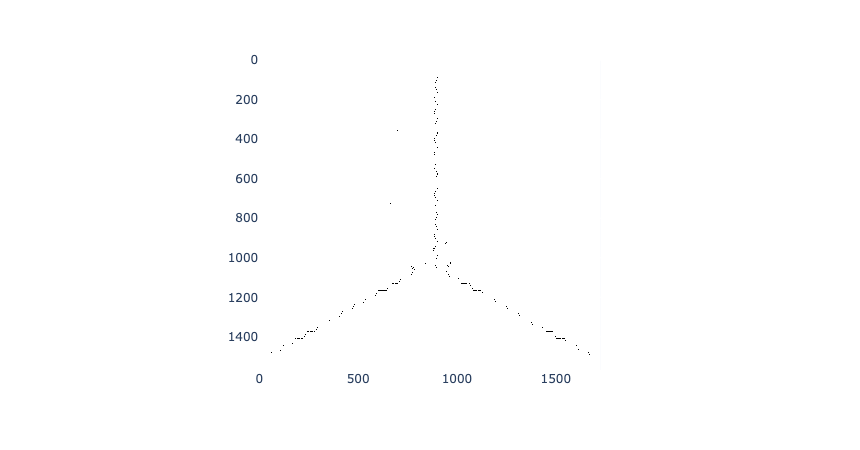

In [77]:
padded_image = pad_image_outsides(image, *shape)
px.imshow(padded_image)

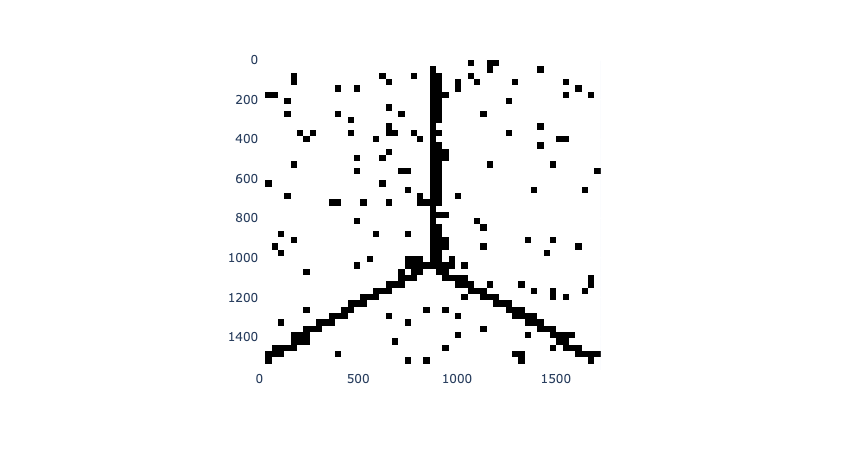

In [78]:
patch_size = 32
reshaped_image = padded_image.reshape(
    shape[0] // patch_size, patch_size, shape[1] // patch_size, patch_size, 3)
_image = reshaped_image.min(axis=(1,3), keepdims=True)
_image = np.broadcast_to(_image, reshaped_image.shape)
_image = _image.reshape(padded_image.shape)
px.imshow(_image)

In [79]:
(_image.reshape(reshaped_image.shape) == 0).max(axis=(1,3)).sum()

840